## 🚅 liteLLM Demo
### TLDR: Call 50+ LLM APIs using chatGPT Input/Output format
https://github.com/BerriAI/litellm

liteLLM is package to simplify calling **OpenAI, Azure, Llama2, Cohere, Anthropic, Huggingface API Endpoints**. LiteLLM manages

* Translating inputs to the provider's `completion()` and `embedding()` endpoints
* Guarantees consistent output, text responses will always be available at `['choices'][0]['message']['content']`
* Exception mapping - common exceptions across providers are mapped to the OpenAI exception types



## Installation and setting Params

In [ ]:
!pip install litellm

In [2]:
from litellm import completion
import os

## Set your API keys
- liteLLM reads your .env, env variables or key manager for Auth

Set keys for the models you want to use below

In [4]:
# Only set keys for the LLMs you want to use
os.environ['OPENAI_API_KEY'] = "" #@param
os.environ["ANTHROPIC_API_KEY"] = "" #@param
os.environ["AZURE_API_BASE"] = "" #@param
os.environ["AZURE_API_VERSION"] = "" #@param
os.environ["AZURE_API_KEY"] = "" #@param
os.environ["REPLICATE_API_TOKEN"] = "" #@param
os.environ["COHERE_API_KEY"] = "" #@param
os.environ["HF_TOKEN"] = "" #@param

In [5]:
messages = [{ "content": "what's the weather in SF","role": "user"}]

## Call chatGPT

In [6]:
completion(model="gpt-3.5-turbo", messages=messages)

Here's your LiteLLM Dashboard 👉 https://admin.litellm.ai/88911906-d786-44f2-87c7-9720e6031b45


<OpenAIObject chat.completion id=chatcmpl-7r6LtlUXYYu0QayfhS3S0OzroiCel at 0x7fb307375030> JSON: {
  "id": "chatcmpl-7r6LtlUXYYu0QayfhS3S0OzroiCel",
  "object": "chat.completion",
  "created": 1692890157,
  "model": "gpt-3.5-turbo-0613",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": "Sorry, I am unable to provide real-time weather information as my browsing capability is disabled. However, you can easily check the current weather in San Francisco by using a search engine or a weather website."
      },
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 13,
    "completion_tokens": 40,
    "total_tokens": 53
  }
}

## LiteLLM Dashboard - Add LLMs, Store Keys, Debug API Call Logs

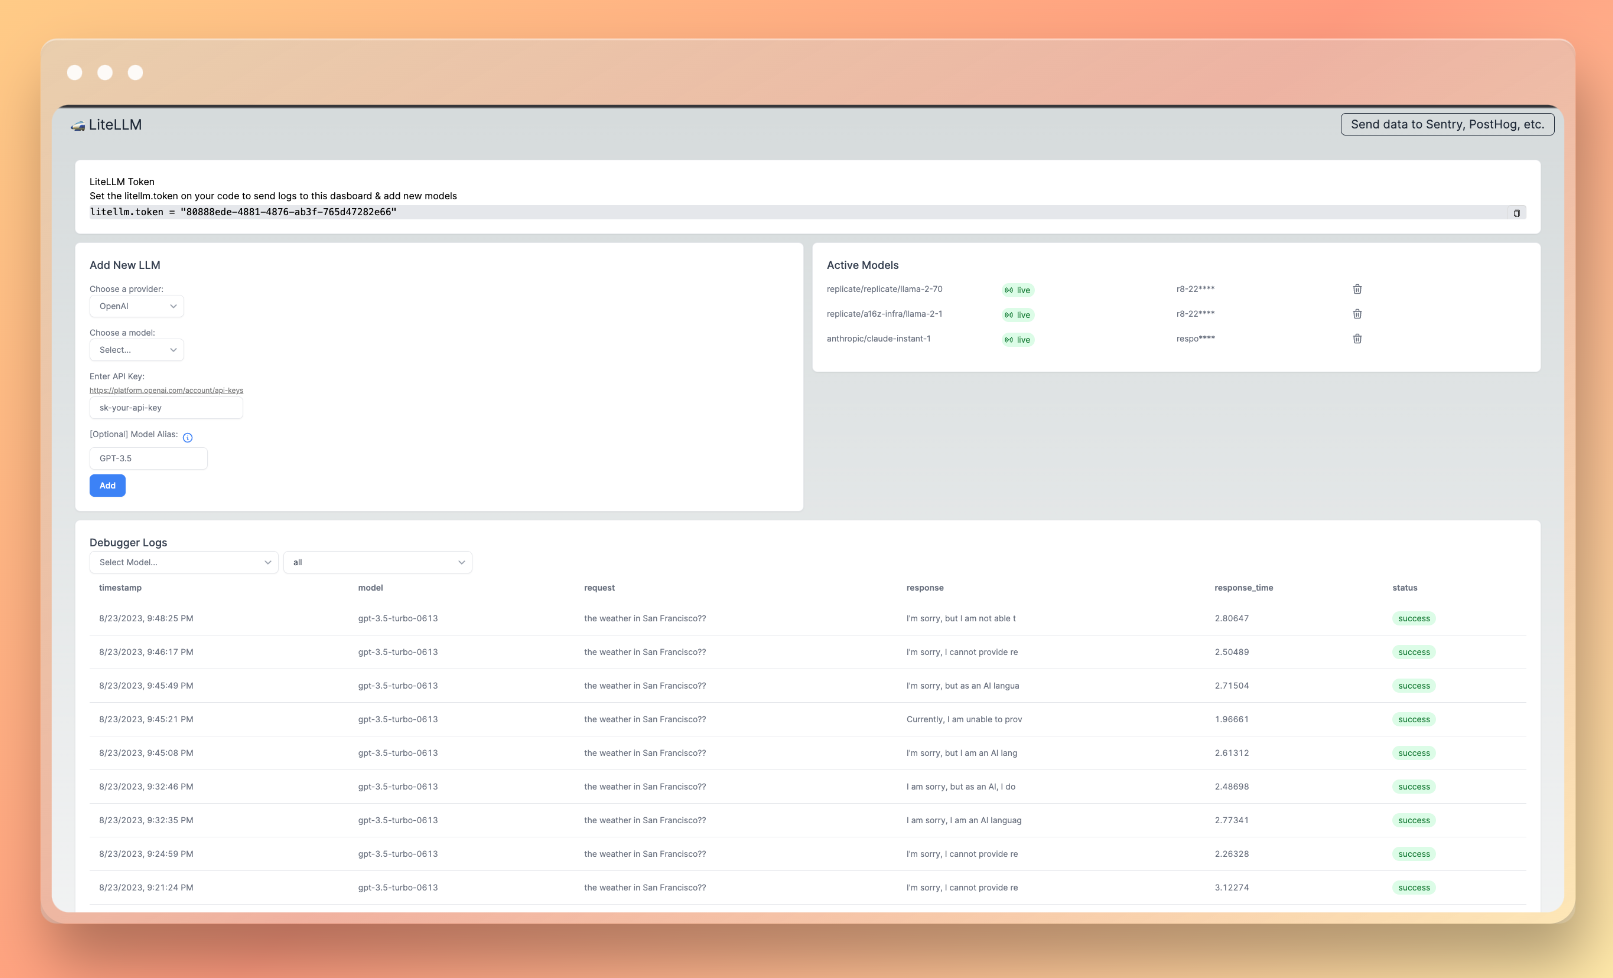

## Call Claude-2

In [ ]:
completion(model="claude-2", messages=messages)

{'choices': [{'finish_reason': 'stop',
   'index': 0,
   'message': {'role': 'assistant',
    'content': " Unfortunately I do not have enough context to provide the current weather in San Francisco. To get the most accurate weather report, it's helpful if I know details like:\n\n- Exact location (city name, zip code, etc)\n- Time frame (current conditions, forecast for a certain day/week, etc)\n\nIf you can provide some more specifics about what weather information you need for San Francisco, I'd be happy to look that up for you!"}}],
 'created': 1691880836.974166,
 'model': 'claude-2',
 'usage': {'prompt_tokens': 18, 'completion_tokens': 95, 'total_tokens': 113}}

## Call llama2 on replicate

In [ ]:
model = "replicate/llama-2-70b-chat:2c1608e18606fad2812020dc541930f2d0495ce32eee50074220b87300bc16e1"
completion(model=model, messages=messages)

{'choices': [{'finish_reason': 'stop',
   'index': 0,
   'message': {'role': 'assistant',
    'content': ' I\'m happy to help! However, I must point out that the question "what\'s the weather in SF" doesn\'t make sense as "SF" could refer to multiple locations (San Francisco, South Florida, San Fernando, etc.). Could you please provide more context or specify which location you\'re referring to? That way, I can give you an accurate answer.'}}],
 'created': 1691880930.9003325,
 'model': 'replicate/llama-2-70b-chat:2c1608e18606fad2812020dc541930f2d0495ce32eee50074220b87300bc16e1',
 'usage': {'prompt_tokens': 6, 'completion_tokens': 74, 'total_tokens': 80}}

## Call Command-Nightly

In [ ]:
completion(model="command-nightly", messages=messages)

{'choices': [{'finish_reason': 'stop',
   'index': 0,
   'message': {'role': 'assistant',
    'content': ' The weather in San Francisco can be quite unpredictable. The city is known for its fog, which can'}}],
 'created': 1691880972.5565543,
 'model': 'command-nightly',
 'usage': {'prompt_tokens': 6, 'completion_tokens': 20, 'total_tokens': 26}}

## Call Azure OpenAI

In [ ]:
completion(deployment_id="chatgpt-test", messages=messages, azure=True)

<OpenAIObject chat.completion id=chatcmpl-7mrtwvpx3okijXmbt9PEYdPMeE7lH at 0x7f76cfb356c0> JSON: {
  "id": "chatcmpl-7mrtwvpx3okijXmbt9PEYdPMeE7lH",
  "object": "chat.completion",
  "created": 1691881296,
  "model": "gpt-35-turbo",
  "choices": [
    {
      "index": 0,
      "finish_reason": "stop",
      "message": {
        "role": "assistant",
        "content": "I'm sorry, as an AI language model, I don't have real-time data. However, you can check the weather forecast for San Francisco on websites such as AccuWeather or Weather Channel."
      }
    }
  ],
  "usage": {
    "completion_tokens": 40,
    "prompt_tokens": 14,
    "total_tokens": 54
  }
}